In [116]:
import pandas as pd
df = pd.read_csv('./RawDataSet/full_NY_Oct-Dec2017_sentiment_prediction.csv',sep=',')

In [117]:
import re
import numpy as np
import pickle

df_dropna = df
df_dropna.dropna(subset=['hashtags'], inplace=True)
hashtags = df_dropna['hashtags']
#print hashtags
hashtag_lst = []
for i in hashtags:
    #print i
    replaced = re.sub("\d+",'',i) #mostly year hashtags #2017, #2018
    replaced = re.sub(r"\b[a-zA-Z]\b", '',replaced) # mostly single character
    replaced = re.sub(r"\b[a-zA-Z][a-zA-Z]\b", '',replaced) # mostly double character
    word = re.findall(r"\#\w+",replaced)
    if word not in hashtag_lst:
        hashtag_lst.extend(word)
#print hashtag_lst

def get_hashtag(text):
    tmp=[]
    for x in hashtag_lst:
        if x in text:
            if x not in tmp:
                tmp.append(x)
    return tmp

df_dropna["hashtaglist"] = df_dropna["text"].apply(get_hashtag)
df_dropna.to_csv("./IntermediateDataSet/tmp.csv")
hashtag_dict = {}
retweet_dict = {}
favorite_dict = {}
for index, row in df_dropna.iterrows():
        #print index, row
        if row['hashtaglist']:
            for h in row['hashtaglist']:
                if h not in hashtag_dict :
                    hashtag_dict[h] =  [row['username']]
                    retweet_dict[h] = int(row['retweets'])
                    favorite_dict[h] = int(row['favorites'])
                else:
                    #print type(hashtag_dict[h]), hashtag_dict[h]
                    hashtag_dict[h].extend([row['username']])
                    retweet_dict[h] += int(row['retweets'])
                    favorite_dict[h] += int(row['favorites'])
print hashtag_dict  # hashtag dictionary
print retweet_dict  # retweet count dictionary - summation done per hashtag
print favorite_dict # favorite count dictionary - summation done per hashtag



{'#goldenhour': ['popofcoral'], '#gaynyc': ['lajackette'], '#Word': ['Oluwasozzy'], '#pic': ['salasala0103', 'WebDesignDevelp'], '#havingfun': ['AnthonysAutoRep'], '#GeoEvents': ['IAMPMUNA'], '#NYCVVV': ['cobayda'], '#classicbeauty': ['amstel89'], '#pan': ['amstel89'], '#newyorkcity': ['AZazzerini', 'Martin_Hirst'], '#thankyou': ['BirdieChesson'], '#cold': ['lajackette'], '#sweet': ['RichardDifred'], '#unforgettablewknd': ['lourdesacevedo9'], '#nyc': ['popofcoral', 'AZazzerini', 'chefsix', 'Kewen_Fu0224', 'jake9437', 'lajackette', 'Martin_Hirst', 'amstel89'], '#takako': ['yokawao0215'], '#fourxmases': ['AnthonysAutoRep'], '#moveoverbitches': ['NYCphoebeQ'], '#homoerot': ['amstel89'], '#videoplayer': ['Thatsuitsyou'], '#photooftheday': ['AZazzerini'], '#livinglife': ['AnthonysAutoRep'], '#fearthewalkingdead': ['dondidonde'], '#yoloswag': ['lourdesacevedo9', 'lourdesacevedo9'], '#appreciation': ['BirdieChesson'], '#ig_photooftheday': ['AZazzerini'], '#holidaymood': ['haridevirokaya'], '#

In [118]:
#merge multiple dict
combinelist = [hashtag_dict, retweet_dict, favorite_dict]
combinedict = {}

for key in set(hashtag_dict.keys() + retweet_dict.keys() + favorite_dict.keys()):
    try:
        combinedict.setdefault(key,[]).append(hashtag_dict[key])        
    except KeyError:
        pass

    try:
        combinedict.setdefault(key,[]).append(retweet_dict[key])          
    except KeyError:
        pass
    
    try:
        combinedict.setdefault(key,[]).append(favorite_dict[key])          
    except KeyError:
        pass

combinedict


{'#ATARDECER': [['CHECO7X'], 0, 0],
 '#Arrrrrrr': [['MOMTRICLUB'], 0, 0],
 '#Artist': [['amigatica'], 0, 0],
 '#BXSports': [['BXSportsNY'], 0, 0],
 '#Bring': [['tea_nj'], 1, 0],
 '#CCIN': [['montanasparks'], 0, 0],
 '#GeoEvents': [['IAMPMUNA'], 0, 0],
 '#Igboprincess': [['chubiiline'], 0, 0],
 '#KPACHO': [['IAMPMUNA'], 0, 0],
 '#LastShow': [['Dai4u13'], 0, 2],
 '#MoMA': [['suzuki_masahito'], 0, 1],
 '#MobileDogGroomingBx': [['GLENNNBX'], 0, 2],
 '#Motivation': [['ArtemAltman'], 0, 1],
 '#NYC': [['cobayda', 'CHECO7X'], 0, 0],
 '#NYCVVV': [['cobayda'], 0, 0],
 '#NewYork': [['davidagnino'], 0, 0],
 '#Newyorkern': [['davidagnino'], 0, 0],
 '#PetPamperingPatrol': [['GLENNNBX'], 0, 2],
 '#SUNSET': [['CHECO7X'], 0, 0],
 '#The': [['TheParkViewCafe',
   'ANDREWACEMAGIC',
   'ANDREWACEMAGIC',
   'ANDREWACEMAGIC',
   'ANDREWACEMAGIC',
   'ANDREWACEMAGIC',
   'ANDREWACEMAGIC',
   'ANDREWACEMAGIC',
   'ANDREWACEMAGIC',
   'BXSportsNY'],
  0,
  1],
 '#TheBronx': [['BXSportsNY'], 0, 0],
 '#TheParkVie

In [119]:
# creating a list of tuples(hashtag1,hashtag2) where the same hashtags were used by common user

edgelst = []
keylist = combinedict.keys()
for key1 in keylist: # hashtag1
    for key2 in keylist : # hashtag2
        if key1 != key2 : # hashtag1 != hashtag2
            tmplist1 = combinedict[key1][0]
            tmplist2 = combinedict[key2][0]
            
            for x in tmplist1: # userlist for hashtag1
                for y in tmplist2: # userlist for hashtag2
                    tup = ()
                    if x == y : # common user between hashtag1 and hashtag2  
                       # check that hashtag1, hashtag2 should not be in the same tweet
                        temp_df = df_dropna[df_dropna['username'].str.contains(x)]
                        flag=False
                        for index, row in temp_df.iterrows():
                            print key1,key2,row['hashtaglist']
                            lst=row['hashtaglist']
                            if(len(lst)!=0):
                                if key1 in lst:
                                    print "key1 matched"
                                    if key2 in lst:
                                        print "key2 matched"
                                        flag = True
                                        break
                                    else:
                                        flag = False
                                else:
                                    flag = False
                            else:
                                flag = True
                            #print flag
                            if flag == False:
                                tup = (key1,key2)
                                if tup not in edgelst and (key2,key1) not in edgelst:
                                    edgelst.append(tup)
                            #        print "user=" , x, ",       tup=", tup
                            flag = False

print edgelst



#goldenhour #nyc ['#nyc', '#goldenhour']
key1 matched
key2 matched
#gaynyc #cold ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#gaynyc #nyc ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#gaynyc #tweetgram ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#gaynyc #newyork ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#gaynyc #onertrade ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#gaynyc #froid ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#gaynyc #love ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#pic #newyork ['#newyork

#winter #just_newyork ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#winter #just_newyork ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#winter #devil ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#winter #devil ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#winter #devil ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#winter #devil ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#wi

#winter #fit ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#winter #fit ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#winter #fit ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
key2 matched
#winter #frozen ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#winter #frozen ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#winter #frozen ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
key2 matched
#

#classicbeauty #newyearsbaby ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
key2 matched
#classicbeauty #newyor_instagram ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#classicbeauty #newyor_instagram ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#classicbeauty #newyor_instagram ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#classicbeauty #newyor_instagram ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#classicbeauty #newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis'

#classicbeauty #goodmorning ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#classicbeauty #goodmorning ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#classicbeauty #goodmorning ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#classicbeauty #goodmorning ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#classicbeauty #twiligh ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#classicbeauty #twiligh ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork

#pan #homoerot ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
key2 matched
#pan #bar ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#pan #bar ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#pan #bar ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#pan #bar ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#pan #centralpark ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#pan #centralpa

#pan #goodmorning ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#pan #twiligh ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#pan #twiligh ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#pan #twiligh ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#pan #twiligh ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#pan #satyr ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
key2 matched
#pan #manha

#newyorkcity #city ['#nyc', '#trip', '#usa', '#photooftheday', '#city', '#newyork', '#newyorkcity', '#newyork_ig', '#ig_photooftheday', '#ig_world']
key1 matched
key2 matched
#newyorkcity #newyork ['#nyc', '#trip', '#usa', '#photooftheday', '#city', '#newyork', '#newyorkcity', '#newyork_ig', '#ig_photooftheday', '#ig_world']
key1 matched
key2 matched
#newyorkcity #newyork ['#nyc', '#newyork', '#newyorkcity', '#man', '#centralpark', '#manhattan', '#theheartofthecity']
key1 matched
key2 matched
#newyorkcity #man ['#nyc', '#newyork', '#newyorkcity', '#man', '#centralpark', '#manhattan', '#theheartofthecity']
key1 matched
key2 matched
#newyorkcity #trip ['#nyc', '#trip', '#usa', '#photooftheday', '#city', '#newyork', '#newyorkcity', '#newyork_ig', '#ig_photooftheday', '#ig_world']
key1 matched
key2 matched
#newyorkcity #usa ['#nyc', '#trip', '#usa', '#photooftheday', '#city', '#newyork', '#newyorkcity', '#newyork_ig', '#ig_photooftheday', '#ig_world']
key1 matched
key2 matched
#newyorkcity

#nyc #centralpark ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#nyc #centralpark ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#nyc #centralpark ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#nyc #centralpark ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
key2 matched
#nyc #newyearseve ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#nyc #newyearseve ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#nyc 

#nyc #satyr ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#nyc #satyr ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#nyc #satyr ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#nyc #satyr ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#nyc #manhattan ['#nyc', '#newyork', '#newyorkcity', '#man', '#centralpark', '#manhattan', '#theheartofthecity']
key1 matched
key2 matched
#nyc #manhattan ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#nyc #manhattan ['#newyork', '#newyork_ig', '#man', '#centralpark'

#homoerot #bar ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#homoerot #bar ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#homoerot #centralpark ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#homoerot #centralpark ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#homoerot #centralpark ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#homoerot #centralpark ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh'

#homoerot #winterfashion ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#homoerot #muscle ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#homoerot #muscle ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#homoerot #muscle ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#homoerot #muscle ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#homoerot #newyork_instagram ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot

#homoerot #newyork_ig ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#homoerot #newyork_ig ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#homoerot #newyork_ig ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#homoerot #newyork_ig ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#homoerot #newyork_ig ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#homoerot #newyork_ig ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', 

#bar #classicbeauty ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#bar #classicbeauty ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#bar #classicbeauty ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#bar #classicbeauty ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#bar #pan ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#bar #pan ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#bar #pan ['#malebeauty', 

#bar #just_newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#bar #just_newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#bar #just_newyork ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#bar #just_newyork ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#bar #just_newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#bar #just_newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#bar #just_n

#mod #photography ['#photography', '#photographer', '#camera', '#mod']
key1 matched
key2 matched
#mod #photographer ['#photography', '#photographer', '#camera', '#mod']
key1 matched
key2 matched
#fashionicon #guccimane ['#gucci', '#guccimane', '#fashion']
#fashionicon #guccimane ['#fashion', '#givenchy', '#fashionicon']
key1 matched
#fashionicon #gucci ['#gucci', '#guccimane', '#fashion']
#fashionicon #gucci ['#fashion', '#givenchy', '#fashionicon']
key1 matched
#fashionicon #fashion ['#gucci', '#guccimane', '#fashion']
#fashionicon #fashion ['#fashion', '#givenchy', '#fashionicon']
key1 matched
key2 matched
#fashionicon #fashion ['#gucci', '#guccimane', '#fashion']
#fashionicon #fashion ['#fashion', '#givenchy', '#fashionicon']
key1 matched
key2 matched
#fashionicon #givenchy ['#gucci', '#guccimane', '#fashion']
#fashionicon #givenchy ['#fashion', '#givenchy', '#fashionicon']
key1 matched
key2 matched
#seaside #holidaymood ['#atlanticcity', '#seaside', '#holidaymood']
key1 matched
key

key1 matched
key2 matched
#centralpark #man ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#centralpark #man ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#centralpark #fitness ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#centralpark #fitness ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#centralpark #fitness ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#centralpark #fitness ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#

#centralpark #muscle ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#centralpark #muscle ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#centralpark #muscle ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#centralpark #muscle ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#centralpark #newyork_instagram ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#centralpark #newyork_instagram ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork

#centralpark #newyork_ig ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#centralpark #newyork_ig ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#centralpark #newyork_ig ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#centralpark #newyork_ig ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#centralpark #whileyouweresleeping ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#centralpark #whileyouweresleeping ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning'

#newyearseve #goodmorning ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#newyearseve #goodmorning ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#newyearseve #goodmorning ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyearseve #goodmorning ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#newyearseve #twiligh ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#newyearseve #twiligh ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork

key1 matched
#newyearseve #bare ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#newyearseve #bare ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyearseve #bare ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#guccimane #fashionicon ['#gucci', '#guccimane', '#fashion']
key1 matched
#guccimane #fashionicon ['#fashion', '#givenchy', '#fashionicon']
#guccimane #gucci ['#gucci', '#guccimane', '#fashion']
key1 matched
key2 matched
#guccimane #fashion ['#gucci', '#guccimane', '#fashion']
key1 matched
key2 matched
#guccimane #fashion ['#gucci', '#guccimane', '#fashion']
key1 matched
key2 matched
#guccimane #givenchy ['#gucci', '#guccimane', '#fashion']
key1 matched
#guccimane #givenchy ['#fashion', '#gi

#newyearsbaby #malebeauty ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
key2 matched
#newyearsbaby #thenewyorklifeinc ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#newyearsbaby #thenewyorklifeinc ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#newyearsbaby #thenewyorklifeinc ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyearsbaby #thenewyorklifeinc ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#newyearsbaby #fit ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#gree

#newyor_instagram #nyc ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyor_instagram #nyc ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#newyor_instagram #nyc ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyor_instagram #nyc ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
key2 matched
#newyor_instagram #homoerot ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyor_instagram #homoerot ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork

#newyor_instagram #muscle ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyor_instagram #muscle ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#newyor_instagram #muscle ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyor_instagram #muscle ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#newyor_instagram #newyork_instagram ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyor_instagram #newyork_instagram ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_ne

#newyor_instagram #whileyouweresleeping ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyor_instagram #whileyouweresleeping ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#newyor_instagram #whileyouweresleeping ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyor_instagram #whileyouweresleeping ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
key2 matched
#newyor_instagram #bare ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyor_instagram #bare ['#newyork', '#newyork_ig', '#man', '#centralpar

#newyork #homoerot ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork #homoerot ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#newyork #homoerot ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyork #homoerot ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#newyork #photooftheday ['#nyc', '#trip', '#usa', '#photooftheday', '#city', '#newyork', '#newyorkcity', '#newyork_ig', '#ig_photooftheday', '#ig_world']
key1 matched
key2 matched
#newyork #ig_photooftheday ['#nyc', '#trip', '#usa', '#photooftheday', '#city', '#newyork', '#newyorkcity', '#newyork_ig', '#ig_photooftheday'

#newyork #aerialcinematography ['#bushwick', '#newyork', '#milkman', '#aerialcinematography', '#aerial', '#dji', '#phantom', '#milk', '#man']
key1 matched
key2 matched
#newyork #greekgod ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork #greekgod ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#newyork #greekgod ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyork #greekgod ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#newyork #greekgod ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homo

#newyork #ig_world ['#nyc', '#trip', '#usa', '#photooftheday', '#city', '#newyork', '#newyorkcity', '#newyork_ig', '#ig_photooftheday', '#ig_world']
key1 matched
key2 matched
#newyork #love ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#newyork #milk ['#bushwick', '#newyork', '#milkman', '#aerialcinematography', '#aerial', '#dji', '#phantom', '#milk', '#man']
key1 matched
key2 matched
#newyork #twiligh ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork #twiligh ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#newyork #twiligh ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyork #twiligh ['#nyc', '#newyork', '#newyor

#newyork #moma ['#newyork', '#picasso', '#moma', '#pic']
key1 matched
key2 matched
#newyork #vangogh ['#newyork', '#picasso', '#moma', '#pic']
key1 matched
#newyork #vangogh ['#newyork', '#moma', '#vangogh']
key1 matched
key2 matched
#newyork #vangogh ['#newyork', '#picasso', '#moma', '#pic']
key1 matched
#newyork #vangogh ['#newyork', '#moma', '#vangogh']
key1 matched
key2 matched
#newyork #thenewyorklifeinc ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork #thenewyorklifeinc ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#newyork #thenewyorklifeinc ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork #thenewyorklifeinc ['#newyork', '#newyork_ig', '#man', '#centralpark'

#newyork #bare ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork #bare ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#newyork #bare ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyork #bare ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#newyork #bare ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork #bare ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#newyork #

#fireandice #just_newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#fireandice #just_newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#fireandice #just_newyork ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#fireandice #just_newyork ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#fireandice #devil ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#fireandice #devil ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#then

#fireandice #frozen ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#fireandice #frozen ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
key2 matched
#fireandice #nycphotography ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#fireandice #nycphotography ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#fireandice #nycphotography ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#fireandice #nycphotography ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping

key1 matched
key2 matched
#man #phantom ['#bushwick', '#newyork', '#milkman', '#aerialcinematography', '#aerial', '#dji', '#phantom', '#milk', '#man']
key1 matched
key2 matched
#man #newyearseve ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#man #newyearseve ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#man #newyearseve ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#man #newyearseve ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#man #newyearsbaby ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#

#man #malebeauty ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#man #malebeauty ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#man #malebeauty ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#man #malebeauty ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#man #malebeauty ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#man #malebeauty ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#man #ma

#fitness #newyor_instagram ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#fitness #newyor_instagram ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#fitness #newyor_instagram ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#fitness #newyor_instagram ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#fitness #newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#fitness #newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#th

#fitness #satyr ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#fitness #satyr ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#fitness #satyr ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#fitness #satyr ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#fitness #manhattan ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#fitness #manhattan ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#fitness #manhattan ['

#fame #flatirondistrict ['#fame', '#blackandwhite']
key1 matched
#fame #flatirondistrict ['#winter', '#flatirondistrict', '#wintery']
#fame #blackandwhite ['#fame', '#blackandwhite']
key1 matched
key2 matched
#fame #wintery ['#fame', '#blackandwhite']
key1 matched
#fame #wintery ['#winter', '#flatirondistrict', '#wintery']
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#Who']
#The #Who ['#Who']
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#Who']
#The #Who ['#Who']
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1 matched
#The #Who ['#The']
key1

#just_newyork #newyearsbaby ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#just_newyork #newyearsbaby ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#just_newyork #newyearsbaby ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#just_newyork #newyearsbaby ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#just_newyork #newyearsbaby ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#just_newyork #newyearsbaby ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresl

#just_newyork #greekgod ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#just_newyork #greekgod ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#just_newyork #greekgod ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#just_newyork #greekgod ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#just_newyork #greekgod ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#just_newyork #waterfall ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#a

#just_newyork #satyr ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#just_newyork #satyr ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#just_newyork #satyr ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#just_newyork #satyr ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#just_newyork #manhattan ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#just_newyork #manhattan ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '

#just_newyork #angel ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#just_newyork #angel ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#just_newyork #angel ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#just_newyork #angel ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#just_newyork #angel ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#just_newyork #angel ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', 

#devil #newyork ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#devil #newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#devil #newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#devil #newyork ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#devil #newyork ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#devil #fireandice ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#devil #fir

#devil #thenewyorklifeinc ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#devil #thenewyorklifeinc ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#devil #thenewyorklifeinc ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#devil #thenewyorklifeinc ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#devil #fit ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#devil #fit ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thene

#aerialcinematography #dji ['#bushwick', '#newyork', '#milkman', '#aerialcinematography', '#aerial', '#dji', '#phantom', '#milk', '#man']
key1 matched
key2 matched
#aerialcinematography #milk ['#bushwick', '#newyork', '#milkman', '#aerialcinematography', '#aerial', '#dji', '#phantom', '#milk', '#man']
key1 matched
key2 matched
#aerialcinematography #milkman ['#bushwick', '#newyork', '#milkman', '#aerialcinematography', '#aerial', '#dji', '#phantom', '#milk', '#man']
key1 matched
key2 matched
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#Who']
key1 matched
#Who #The ['#Who']
key1 matched
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#Who']
key1 matched
#Who #The ['#Who']
key1 matched
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#The']
#Who #The ['#T

#greekgod #twiligh ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#greekgod #twiligh ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#greekgod #twiligh ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#greekgod #twiligh ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#greekgod #satyr ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
key2 matched
#greekgod #manhattan ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', 

key2 matched
#gucci #fashion ['#gucci', '#guccimane', '#fashion']
key1 matched
key2 matched
#gucci #fashion ['#gucci', '#guccimane', '#fashion']
key1 matched
key2 matched
#gucci #givenchy ['#gucci', '#guccimane', '#fashion']
key1 matched
#gucci #givenchy ['#fashion', '#givenchy', '#fashionicon']
#trip #newyorkcity ['#nyc', '#trip', '#usa', '#photooftheday', '#city', '#newyork', '#newyorkcity', '#newyork_ig', '#ig_photooftheday', '#ig_world']
key1 matched
key2 matched
#trip #nyc ['#nyc', '#trip', '#usa', '#photooftheday', '#city', '#newyork', '#newyorkcity', '#newyork_ig', '#ig_photooftheday', '#ig_world']
key1 matched
key2 matched
#trip #nyc ['#nyc', '#trip']
key1 matched
key2 matched
#trip #photooftheday ['#nyc', '#trip', '#usa', '#photooftheday', '#city', '#newyork', '#newyorkcity', '#newyork_ig', '#ig_photooftheday', '#ig_world']
key1 matched
key2 matched
#trip #ig_photooftheday ['#nyc', '#trip', '#usa', '#photooftheday', '#city', '#newyork', '#newyorkcity', '#newyork_ig', '#ig_phot

#waterfall #muscle ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#waterfall #muscle ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#waterfall #muscle ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
key2 matched
#waterfall #newyork_instagram ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#waterfall #newyork_instagram ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#waterfall #newyork_instagram ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscl

#waterfall #newyork_ig ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#waterfall #newyork_ig ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#waterfall #newyork_ig ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#waterfall #newyork_ig ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#waterfall #newyork_ig ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#waterfall #newyork_ig ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyo

#winterfashion #just_newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#winterfashion #just_newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#winterfashion #just_newyork ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#winterfashion #just_newyork ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#winterfashion #just_newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#winterfashion #just_newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyor

#winterfashion #frozen ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#winterfashion #frozen ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#winterfashion #frozen ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
key2 matched
#winterfashion #nycphotography ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#winterfashion #nycphotography ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#winterfashion #nycphotography ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#w

#muscle #winter ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#muscle #winter ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#muscle #winter ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
key2 matched
#muscle #classicbeauty ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#muscle #classicbeauty ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#muscle #classicbeauty ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare

key1 matched
#muscle #devil ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#muscle #greekgod ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#muscle #greekgod ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#muscle #greekgod ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#muscle #greekgod ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#muscle #waterfall ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#mus

#froid #gaynyc ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#froid #cold ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#froid #nyc ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#froid #tweetgram ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#froid #newyork ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#froid #onertrade ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#froid #love ['#nyc', '#newyork', '#cold', '#onertrade', '#froid', '#gaynyc', '#love', '#tweetgram']
key1 matched
key2 matched
#education #Igboprincess []
#education #Igboprincess []
#education #Igboprincess []
#education #I

#newyork_instagram #newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_instagram #newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#newyork_instagram #newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_instagram #newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#newyork_instagram #fireandice ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_instagram #fireandice ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorn

#newyork_instagram #manhattan ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_instagram #manhattan ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#newyork_instagram #icicles ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_instagram #icicles ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#newyork_instagram #icicles ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyork_instagram #icicles ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whi

#adonis #bar ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#adonis #bar ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#adonis #bar ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#adonis #bar ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#adonis #centralpark ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#adonis #centralpark ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#adonis #centralpar

#adonis #goodmorning ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#adonis #goodmorning ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#adonis #twiligh ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#adonis #twiligh ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#adonis #twiligh ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#adonis #twiligh ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#adonis #s

#fashion #gucci ['#gucci', '#guccimane', '#fashion']
key1 matched
key2 matched
#fashion #fashionblogger ['#fashion', '#fashionblogger', '#fashionblog']
key1 matched
key2 matched
#fashion #givenchy ['#gucci', '#guccimane', '#fashion']
key1 matched
#fashion #givenchy ['#fashion', '#givenchy', '#fashionicon']
key1 matched
key2 matched
#fashion #givenchy ['#gucci', '#guccimane', '#fashion']
key1 matched
#fashion #givenchy ['#fashion', '#givenchy', '#fashionicon']
key1 matched
key2 matched
#grandpa #nyc ['#nyc', '#familyfirst', '#grandpa', '#granddaughter']
key1 matched
key2 matched
#grandpa #granddaughter ['#nyc', '#familyfirst', '#grandpa', '#granddaughter']
key1 matched
key2 matched
#grandpa #familyfirst ['#nyc', '#familyfirst', '#grandpa', '#granddaughter']
key1 matched
key2 matched
#goodmorning #winter ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#goodmorning #winter ['#newyork', '#newyork_

#goodmorning #fireandice ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#goodmorning #fireandice ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#goodmorning #man ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#goodmorning #man ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#goodmorning #fitness ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#goodmorning #fitness ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#the

#goodmorning #fit ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#goodmorning #fit ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#goodmorning #fit ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#goodmorning #frozen ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#goodmorning #frozen ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#goodmorning #frozen ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#

#twiligh #pan ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#twiligh #pan ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#twiligh #pan ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#twiligh #nyc ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#twiligh #nyc ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#twiligh #nyc ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#twiligh #nyc ['#nyc', '#newyork', '#ne

#twiligh #greekgod ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#twiligh #waterfall ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#twiligh #waterfall ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#twiligh #waterfall ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#twiligh #waterfall ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#twiligh #winterfashion ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', 

#twiligh #whileyouweresleeping ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#twiligh #whileyouweresleeping ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#twiligh #whileyouweresleeping ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#twiligh #whileyouweresleeping ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
key2 matched
#twiligh #bare ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#twiligh #bare ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#n

#satyr #just_newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#satyr #just_newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#satyr #just_newyork ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#satyr #just_newyork ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#satyr #devil ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
key2 matched
#satyr #greekgod ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty',

#satyr #newyork_ig ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#satyr #newyork_ig ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#satyr #newyork_ig ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#satyr #newyork_ig ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#satyr #newyork_ig ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#satyr #newyork_ig ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']

#manhattan #muscle ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#manhattan #newyork_instagram ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#manhattan #newyork_instagram ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#manhattan #adonis ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#manhattan #adonis ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#manhattan #adonis ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#mu

#manhattan #whileyouweresleeping ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#manhattan #whileyouweresleeping ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#manhattan #whileyouweresleeping ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#manhattan #whileyouweresleeping ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#manhattan #bare ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#manhattan #bare ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#ne

#icicles #winterfashion ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
key2 matched
#icicles #muscle ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#icicles #muscle ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#icicles #muscle ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
key2 matched
#icicles #newyork_instagram ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#icicles #newyork_instagram ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '

#icicles #newyork_ig ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#icicles #newyork_ig ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#icicles #whileyouweresleeping ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#icicles #whileyouweresleeping ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#icicles #whileyouweresleeping ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#icicles #whileyouweresleeping ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouwereslee

#malebeauty #newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#malebeauty #newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#malebeauty #newyork ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#malebeauty #newyork ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#malebeauty #newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#malebeauty #newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagra

key1 matched
key2 matched
#malebeauty #waterfall ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#malebeauty #waterfall ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#malebeauty #waterfall ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
key2 matched
#malebeauty #waterfall ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#malebeauty #waterfall ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#malebeauty #waterfall ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#fr

#malebeauty #manhattan ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#malebeauty #manhattan ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#malebeauty #manhattan ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#malebeauty #manhattan ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#malebeauty #manhattan ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#malebeauty #manhattan ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '

#malebeauty #newyork_ig ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#malebeauty #newyork_ig ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#malebeauty #newyork_ig ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#malebeauty #newyork_ig ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#malebeauty #newyork_ig ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#malebeauty #newyork_ig ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', 

#thenewyorklifeinc #newyor_instagram ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#thenewyorklifeinc #newyor_instagram ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#thenewyorklifeinc #newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#thenewyorklifeinc #newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#thenewyorklifeinc #newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#thenewyorklifeinc #newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#

#thenewyorklifeinc #manhattan ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#thenewyorklifeinc #manhattan ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#thenewyorklifeinc #icicles ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#thenewyorklifeinc #icicles ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#thenewyorklifeinc #icicles ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#thenewyorklifeinc #icicles ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whi

#fit #man ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#fit #man ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#fit #man ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#fit #man ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#fit #fitness ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#fit #fitness ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#fit #fitness ['#malebeauty', '#bar', '#fireandice', '#wat

key1 matched
#fit #thenewyorklifeinc ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#fit #frozen ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#fit #frozen ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#fit #frozen ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
key2 matched
#fit #nycphotography ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#fit #nycphotography ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifei

#frozen #fireandice ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#frozen #fireandice ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#frozen #fireandice ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
key2 matched
#frozen #man ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#frozen #man ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#frozen #man ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#f

#frozen #malebeauty ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#frozen #malebeauty ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#frozen #malebeauty ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
key2 matched
#frozen #thenewyorklifeinc ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#frozen #thenewyorklifeinc ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#frozen #thenewyorklifeinc ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#

#nycphotography #fitness ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#nycphotography #fitness ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#nycphotography #fitness ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#nycphotography #fitness ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#nycphotography #just_newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#nycphotography #just_newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_

#nycphotography #thenewyorklifeinc ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#nycphotography #thenewyorklifeinc ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#nycphotography #thenewyorklifeinc ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#nycphotography #thenewyorklifeinc ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#nycphotography #fit ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#nycphotography #fit ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#jus

#angel #newyor_instagram ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#angel #newyor_instagram ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#angel #newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#angel #newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#angel #newyork ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#angel #newyork ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#angel

#angel #malebeauty ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
key2 matched
#angel #thenewyorklifeinc ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
key1 matched
#angel #thenewyorklifeinc ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#angel #thenewyorklifeinc ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#angel #thenewyorklifeinc ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#angel #fit ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil

#newyork_ig #classicbeauty ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_ig #classicbeauty ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#newyork_ig #classicbeauty ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyork_ig #classicbeauty ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#newyork_ig #classicbeauty ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_ig #classicbeauty ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyo

#newyork_ig #newyearsbaby ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_ig #newyearsbaby ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#newyork_ig #newyearsbaby ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyork_ig #newyearsbaby ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#newyork_ig #newyearsbaby ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_ig #newyearsbaby ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '

#newyork_ig #just_newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_ig #just_newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#newyork_ig #just_newyork ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_ig #just_newyork ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#newyork_ig #devil ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_ig #devil ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyo

#newyork_ig #goodmorning ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_ig #goodmorning ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#newyork_ig #goodmorning ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_ig #goodmorning ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
key2 matched
#newyork_ig #ig_world ['#nyc', '#trip', '#usa', '#photooftheday', '#city', '#newyork', '#newyorkcity', '#newyork_ig', '#ig_photooftheday', '#ig_world']
key1 matched
key2 matched
#newyork_ig #twiligh ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#saty

#newyork_ig #fit ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_ig #fit ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 matched
#newyork_ig #fit ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#newyork_ig #fit ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#newyork_ig #frozen ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#newyork_ig #frozen ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
key1 

#givenchy #gucci ['#gucci', '#guccimane', '#fashion']
#givenchy #gucci ['#fashion', '#givenchy', '#fashionicon']
key1 matched
#givenchy #fashion ['#gucci', '#guccimane', '#fashion']
#givenchy #fashion ['#fashion', '#givenchy', '#fashionicon']
key1 matched
key2 matched
#givenchy #fashion ['#gucci', '#guccimane', '#fashion']
#givenchy #fashion ['#fashion', '#givenchy', '#fashionicon']
key1 matched
key2 matched
#Newyorkern #NewYork []
#Newyorkern #NewYork ['#Newyorkern', '#NewYork']
key1 matched
key2 matched
#roadtrip #moveoverbitches ['#moveoverbitches', '#bulldogsrule', '#roadtrip']
key1 matched
key2 matched
#roadtrip #bulldogsrule ['#moveoverbitches', '#bulldogsrule', '#roadtrip']
key1 matched
key2 matched
#TheParkView #The ['#TheParkView', '#The']
key1 matched
key2 matched
#artsts #actors ['#artsts', '#actors', '#designers']
key1 matched
key2 matched
#artsts #designers ['#artsts', '#actors', '#designers']
key1 matched
key2 matched
#whileyouweresleeping #winter ['#newyearsbaby', '#newy

#whileyouweresleeping #satyr ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#whileyouweresleeping #satyr ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#whileyouweresleeping #satyr ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
#whileyouweresleeping #satyr ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
key1 matched
#whileyouweresleeping #manhattan ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#whileyouweresleeping #manhattan ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#jus

#bare #centralpark ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#bare #centralpark ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#bare #centralpark ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#bare #centralpark ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#bare #centralpark ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#bare #centralpark ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twi

#bare #satyr ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#bare #satyr ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#bare #satyr ['#malebeauty', '#bar', '#fireandice', '#waterfall', '#icicles', '#frozen', '#winterfashion', '#winter', '#muscle', '#fit', '#fitness', '#bare']
key1 matched
#bare #satyr ['#nyc', '#newyork', '#newyork_ig', '#centralpark', '#just_newyork', '#whileyouweresleeping', '#newyor_instagram', '#nycphotography', '#twiligh']
#bare #manhattan ['#newyearsbaby', '#newyearseve', '#malebeauty', '#adonis', '#greekgod', '#satyr', '#pan', '#angel', '#devil', '#classicbeauty', '#homoerot']
#bare #manhattan ['#newyork', '#newyork_ig', '#man', '#centralpark', '#goodmorning', '#manhattan', '#just_newyork', '#newyork_instagram', '#thenewyorklifeinc']
#bare #manhattan ['#malebeauty', '#bar',

In [120]:
import networkx as nx
DG = nx.DiGraph()

#DG.add_nodes_from(keylist)
DG.add_edges_from(edgelst)

In [121]:
DG.number_of_nodes()

65

In [122]:
DG.number_of_edges()

623

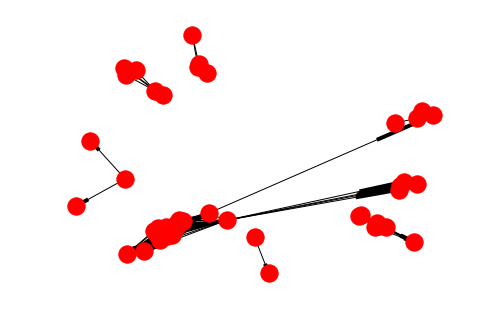

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(DG)
plt.show()

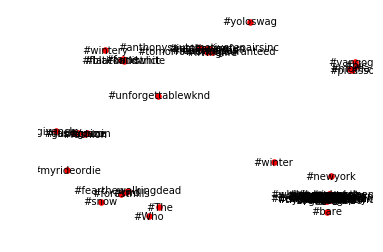

In [124]:
pos = nx.spring_layout(DG, iterations=100)
nx.draw_networkx_nodes(DG, pos, node_size = 30)
#nx.draw_networkx_edges(DG, pos)
nx.draw_networkx_labels(DG, pos, font_size=10)
plt.axis("off")
plt.savefig("./ProcessedDataSet/user_graph_NY.png")
plt.show()

In [125]:
## calculate centrality metrics:
degree = nx.degree_centrality(DG)
between = nx.betweenness_centrality(DG)
close = nx.closeness_centrality(DG)
#eigen = nx.eigenvector_centrality(DG)

In [126]:
## print the multiple centrality metrics to a single line for each node:
import csv
csvfile =  open('./ProcessedDataSet/hashtag_NY.csv', 'w')
   # networkwriter = csv.writer(csvfile, delimiter=' ')
csvfile.write("Hashtag,degree centrality, betweenness centrality, closeness centrality \n")
for n in DG:
    print ("%s, %f, %f, %f"%(n, degree[n], between[n], close[n]))
    row = n + "," + str(degree[n]) + "," + str(between[n]) + "," + str(close[n]) + "\n"
    csvfile.write(row)
csvfile.close()

#twd, 0.046875, 0.000248, 0.031250
#pic, 0.015625, 0.000000, 0.000000
#satyr, 0.390625, 0.000000, 0.281250
#flatirondistrict, 0.062500, 0.000248, 0.031250
#blackandwhite, 0.046875, 0.000000, 0.035156
#havingfun, 0.093750, 0.000000, 0.000000
#myrideordie, 0.015625, 0.000000, 0.015625
#classicbeauty, 0.390625, 0.000000, 0.015625
#pan, 0.390625, 0.000000, 0.015625
#newyork, 0.562500, 0.003162, 0.156250
#picasso, 0.015625, 0.000000, 0.000000
#fireandice, 0.546875, 0.000682, 0.171875
#icicles, 0.546875, 0.000505, 0.406250
#wintery, 0.062500, 0.000000, 0.062500
#nyc, 0.546875, 0.001061, 0.046875
#muscle, 0.546875, 0.000654, 0.296875
#vangogh, 0.062500, 0.000000, 0.127604
#moma, 0.015625, 0.000000, 0.000000
#fourxmases, 0.078125, 0.000000, 0.015625
#manhattan, 0.546875, 0.000505, 0.390625
#man, 0.546875, 0.000682, 0.187500
#homoerot, 0.390625, 0.000000, 0.041667
#tomorrowisnotgauranteed, 0.093750, 0.000083, 0.062500
#thenewyorklifeinc, 0.546875, 0.000239, 0.437500
#bar, 0.546875, 0.000941, 0.

# 